## Assignmen 2 vj222hx

Add imports

In [529]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

Load the Boston.csv file

In [530]:
csvFile = pd.read_csv("Boston.csv", index_col=0)

Display the number of features and their names:

In [531]:
colNames = csvFile.columns.tolist()
print(f"Number of columns {len(colNames)}")
print(f"Column Names {colNames}")

Number of columns 14
Column Names ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


Print a statistic summary of the predictors and the response:

In [532]:
csvFile.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Display the number of datapoints

In [533]:
print(f"Number of datapoints {len(csvFile)}")

Number of datapoints 506


Display the data in a table


In [534]:
print(csvFile.head(20))

       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
1   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
2   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
3   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
4   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
5   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
6   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
7   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
8   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
9   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
11  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
12  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
13  0.09378  12.5   7.87     0  0.524  5.889   39.0

Plot lstat and rm

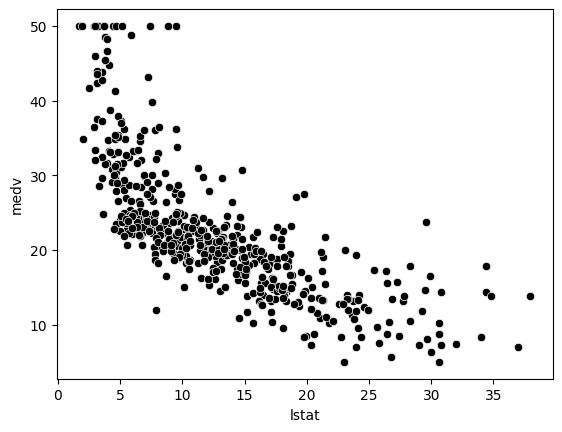

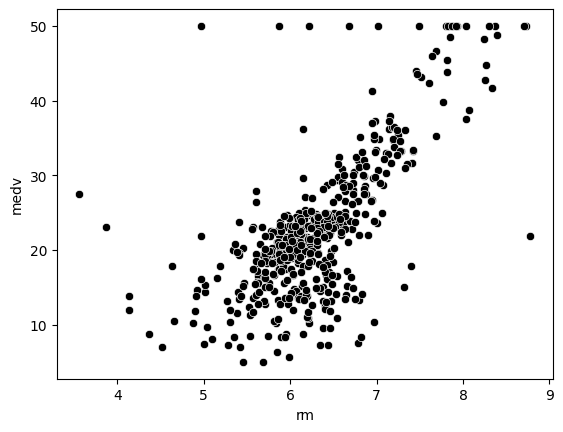

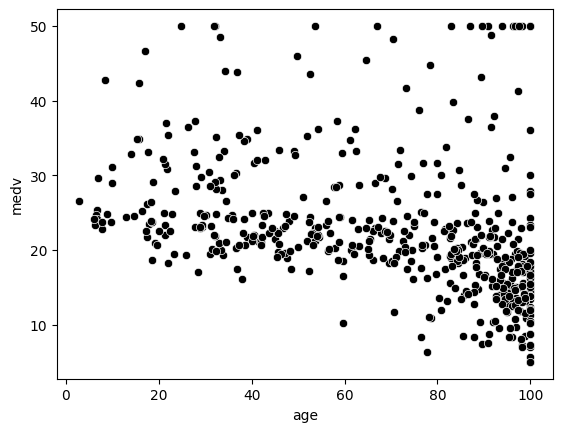

In [535]:
sns.scatterplot(x="lstat", y="medv", data=csvFile, color="black")
plt.show()
sns.scatterplot(x="rm", y="medv", data=csvFile, color="black")
plt.show()
sns.scatterplot(x="age", y="medv", data=csvFile, color="black")
plt.show()

Do linear regression

In [536]:
reg1 = sm.OLS(csvFile["medv"], sm.add_constant(csvFile["lstat"])).fit()
print(reg1.summary())
reg2 = sm.OLS(csvFile["medv"], sm.add_constant(csvFile["rm"])).fit()
print(reg2.summary())
reg3 = sm.OLS(csvFile["medv"], sm.add_constant(csvFile["age"])).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        19:35:26   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

On the first one we can see that R-squared is 0.544 which means that 54.4% of the variance can be explained with the model. The prob f-statistics line of 5.08e-88 is very low which means it is highly statistically significant, a value of < 0.05 indicating that it is 95% statstically significant

The same interpretation can be made of the other values of 0.484 and 2.49e-74, and 0.142 and 1.57e-18 for the third one. All f-statistics are low enough to statistically significant. 

In [537]:
print(reg1.conf_int())
print(reg2.conf_int())
print(reg3.conf_int())

               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951
               0          1
const -39.876641 -29.464601
rm      8.278855   9.925363
               0          1
const  29.015752  32.941604
age    -0.149647  -0.096679


These values indicate the lower and upper bound of the 95% confidence interval. The first row is the y intercept and the second row shows the steepness of the graph. A smaller interval in the slope shows that the model is more accurate. The first and the third one are slightly negativly correlated with a small interval. The middle one is highly positivly correlated but it has a slightly larger interval.

Use the model

In [538]:
new_lstat = pd.DataFrame({'lstat': [5, 10, 15]})
new_lstat = sm.add_constant(new_lstat)
pred1 = reg1.get_prediction(new_lstat).summary_frame(alpha=0.05)
print(pred1[['mean', 'obs_ci_lower', 'obs_ci_upper']])

new_rm = pd.DataFrame({'rm': [5, 6.5, 8]})
new_rm = sm.add_constant(new_rm)
pred2 = reg2.get_prediction(new_rm).summary_frame(alpha=0.05)
print(pred2[['mean', 'obs_ci_lower', 'obs_ci_upper']])

new_age = pd.DataFrame({'age': [25, 50, 75]})
new_age = sm.add_constant(new_age)
pred3 = reg3.get_prediction(new_age).summary_frame(alpha=0.05)
print(pred3[['mean', 'obs_ci_lower', 'obs_ci_upper']])

        mean  obs_ci_lower  obs_ci_upper
0  29.803594     17.565675     42.041513
1  25.053347     12.827626     37.279068
2  20.303101      8.077742     32.528459
        mean  obs_ci_lower  obs_ci_upper
0  10.839924     -2.214474     23.894322
1  24.493088     11.480391     37.505784
2  38.146251     25.058353     51.234149
        mean  obs_ci_lower  obs_ci_upper
0  27.899610     11.090368     44.708852
1  24.820542      8.043748     41.597335
2  21.741474      4.971031     38.511917


The values inserted in the first regression is 5, 10 and 15. This means that an lstat of 5 will mean that it will have a medv of between 17.56 and 42.04 with a 95% probabilty. 10 and 15 will have a value between (12.82, 37.28) and (8.08, 32.53) respectivly with a 95% probaility. We also inserted 5, 6.5 and 8 into rm and the same values can be interpreted from the second matrix in the output. I also inserted 20, 50, and 75 into age and the same data can be read from the third matrix in the output.

In [539]:
reg = sm.OLS(csvFile["medv"], sm.add_constant(csvFile[["lstat", "rm", "age"]])).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     296.2
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.20e-110
Time:                        19:35:26   Log-Likelihood:                -1582.4
No. Observations:                 506   AIC:                             3173.
Df Residuals:                     502   BIC:                             3190.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1753      3.182     -0.369      0.7

Here we can see that R-squared is 0.639 which means that 63.9% of the variance can be explained with the model. The prob f-statistics line of 1.2e-110 is very low which means it is highly statistically significant, a value of < 0.05 indicating that it is 95% statstically significant

In [540]:
reg = sm.OLS(csvFile["medv"], sm.add_constant(csvFile.drop(columns=["medv"]))).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          6.72e-135
Time:                        19:35:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Here we can see that R-squared is 0.741 which means that 74.1% of the variance can be explained with the model. The prob f-statistics line of 6.72e-135 is very low which means it is highly statistically significant, a value of < 0.05 indicating that it is 95% statstically significant. 

Correlation plot

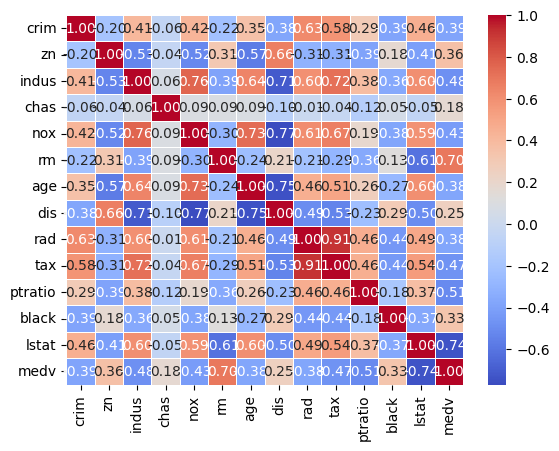

In [541]:
sns.heatmap(csvFile.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

This shows the correlation coefficient of all variables. A value of 0 means there is no correlation i.e. a very scattered graph, 1 means that an increase of one variable implies a drirect increase of the other i.e. a straight line with positive slope, -1 means that an increase of one variable implies a direct decrease of the other i.e a straight line with negative slope. Floats in between means a correlation but not a straight line. Example is zn and crim has a correlation coeficcient of -0.2 which means a plot between them would mean a relativly scattered plot but with a slight downwards trajectory. 

Use the multiple linear regression model to predict the medv values

In [542]:
selected_predictor_values = pd.DataFrame(pd.MultiIndex.from_product([[5, 10, 15], [5, 6.5, 8]], names=["lstat", "rm"]).to_frame(index=False))
print(selected_predictor_values)

reg = sm.OLS(csvFile["medv"], sm.add_constant(csvFile[["lstat", "rm"]])).fit()
selected_predictor_values = sm.add_constant(selected_predictor_values)
predictions = reg.get_prediction(selected_predictor_values)
pred_summary = predictions.summary_frame(alpha=0.05)
print(pred_summary[["mean", "obs_ci_lower", "obs_ci_upper"]])

   lstat   rm
0      5  5.0
1      5  6.5
2      5  8.0
3     10  5.0
4     10  6.5
5     10  8.0
6     15  5.0
7     15  6.5
8     15  8.0
        mean  obs_ci_lower  obs_ci_upper
0  20.903875      9.889729     31.918021
1  28.546057     17.635923     39.456192
2  36.188239     25.225479     47.150999
3  17.692084      6.722152     28.662016
4  25.334266     14.437027     36.231505
5  32.976448     21.995024     43.957872
6  14.480292      3.537875     25.422709
7  22.122474     11.221204     33.023745
8  29.764656     18.747835     40.781477


The first row means that a lstat and an rm value of 5 will give us a medv betweem (9.89, 31,91) with a confidence of 95%. For the last one, an lstat of 15 and an rm of 8 will give us a medv between (18.75, 40.78) with a confidence of 95%. The same can be said for all combinations of lstat = [5, 10, 15] and rm = [5, 6.5, 8].